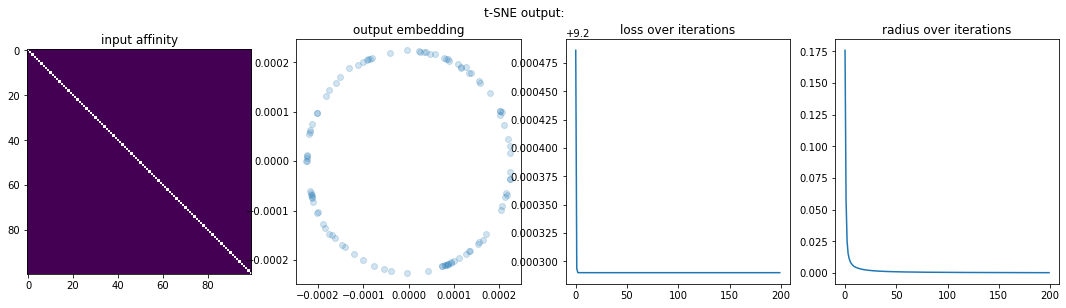

In [2]:
from Functions import *
#import matplotlib.pyplot as plt

#X = np.array([[-0,0], [2,0],[0,0]])
#Y, loss_curve, radius_curve = tsne(X, no_dims=1, initial_dims=100, perplexity=20.0,alpha=1,max_iter=5000)

n = 100
P = np.ones((n,n))-np.eye(n)
P /= sum(sum(P))
#X = [[1,0],[1,0],[0,2]]
Y, loss_curve, radius_curve, Z_curve = tsne_(P, no_dims=2, max_iter=2000, simple_grad=False)

standard_plot(Y, P, loss_curve, radius_curve ,dim=2,saveto='visuals/tsne-on-uniform.png')

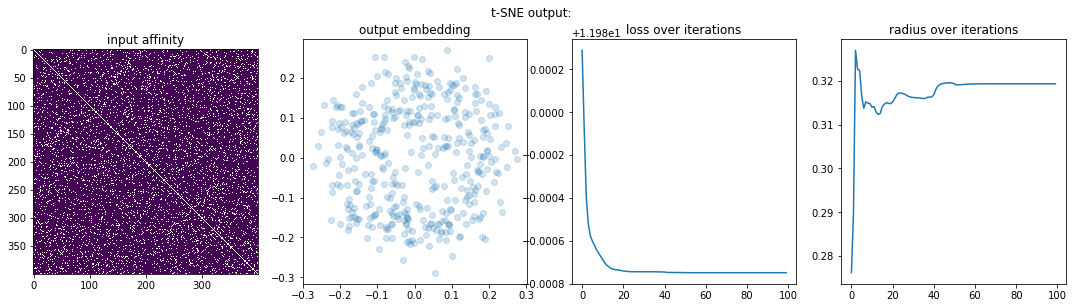

In [4]:
G = nx.erdos_renyi_graph(400,p=0.9)
G = nx.to_numpy_array(G)
G /= sum(sum(G))

Y, loss_curve, radius_curve, Z_curve= tsne_(G, no_dims=2, max_iter=1000, simple_grad=False)

standard_plot(Y, G, loss_curve, radius_curve,dim=2,saveto='visuals/tsne-on-erdosrenyi.png')

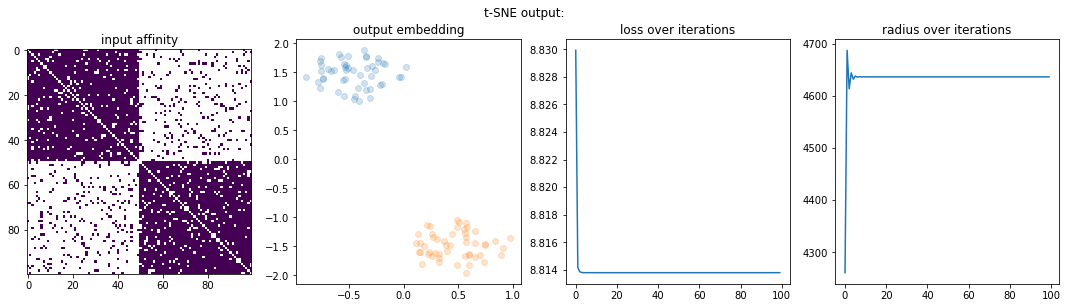

In [6]:
def sbm_2cluster(block_ratio,num_pts=100,p=0.9):

    # Stochastic Block Model
    block1 = int(num_pts/(1+block_ratio) )
    block2 = int(num_pts*block_ratio/(1+block_ratio) )

    p=0.9

    G = nx.stochastic_block_model([block1,block2], [[p,1-p],[1-p,p]], seed=10)
    G = nx.to_numpy_array(G)
    G/=sum(sum(G))
    partition = [list(range(block1)), list(range(block1, block1+block2))]

    return G, partition

G,partition = sbm_2cluster(1)
Y, loss_curve, radius_curve, Z_curve = tsne_(G, no_dims=2, max_iter=1000, simple_grad=False)
standard_plot(Y, G, loss_curve, Z_curve,dim=2,partition=partition, saveto='visuals/tsne-on-sbm2')